In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plotClass(X,y,p):
    plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            
    plt.show()

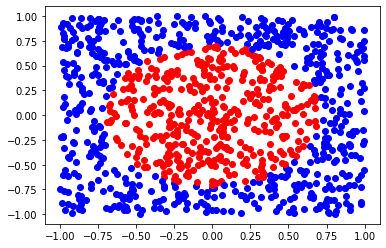

(2, 1000)
(1, 1000)


In [3]:
#Q1
num_data=1000 # data points per class

X=np.random.uniform(-1,1,[2,num_data])
y=X[0,:]**2+X[1,:]**2-0.5>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

# Simple Case

Let's begin by implementing Logistic Regression with vanilla gradient descent.

In [6]:
eps = 1e-20 # A small offset called epsilon. This will be used to ensure we don't get divide by 0 errors
nb = 3 #The number of bases for our features

# Function for calculating z
def get_z(W,X):
  return W@X

# Function for passing our pre-computed z value through a sigmoid non-linearity
def get_sigmoid(z):
  return 1/(1+np.exp(-z))

# Calculate the Binary Cross Entropy (BCE) Loss
def get_loss(y,yhat):
  return np.sum(-y*np.log(yhat+eps) - (1-y)*np.log(1-yhat+eps), axis =1)


A=[] #List for appending/storing our newly created features

# Create our features - similar to creating features in the 2d linear regression examples
# the below method uses nested for-loops however a better solution would use vectorization
for i in range(nb):
  for j in range(nb):
    A.append(X[0,:]**i * X[1,:]**j)

# Convert our list to a numpy array
A = np.array(A)

ls =[] #Create a list for storing our loss values

#The learning rate (lr) is a user definable hyperparameter. A good value to start with is 1e-4
# We could alos implement annealing to reduce the learning rate through training
lr = 0.0001 

# Another hyperparamter is the number of epochs.
# This is easy to tune as if the loss funcion has not plateaued/converged then we need more epochs.
epochs = 10000

# Initialise our weights randomly. FYI - This should equal the number of features squared
W = np.random.randn(1, A.shape[0])

# We now need to iteratively calculate our loss, calulate our gradients and take a step towards better weights.
# An iteration here is called an "epoch"
for epoch in range(epochs):
  # First step is to calculate the loss for the current weights
  z = get_z(W,A)
  yhat = get_sigmoid(z)
  loss = get_loss(y, yhat)


  ls.append(loss) # Save the loss to plot later. (Ideally we would plot this every epoch to check the loss is going down)

  # Second step - calculate the gradients
  dZ = yhat - y
  dW = dZ@A.T

  # Third step - Update the weights 
  W -= lr*dW

# After the final epoch print our results
# plt.plot(ls)
# plt.figure()
# plotClass(X,yhat>0.5,'x')

W.shape

(1, 9)

# Logisitic Regression using SciKit-Learn

An example of how we would utilise a typical python library to do this in future.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


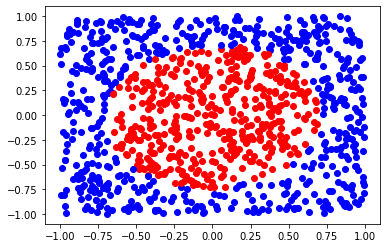

In [ ]:
import sklearn.linear_model as lm
import sklearn.preprocessing as preprocessing
import sklearn.pipeline as pipeline


pipeline = pipeline.Pipeline([ ('basis', preprocessing.PolynomialFeatures(3)), ('model', lm.LogisticRegression())])
pipeline.fit(X.T,y.reshape(-1,1))

yhat = pipeline.predict(X.T)

plotClass(X,yhat.reshape(1,-1),'o')

In [ ]:
yhat.shape

(1000,)

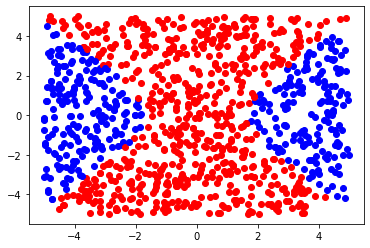

(2, 1000)
(1, 1000)


In [ ]:
#Q2
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=X[0,:]**2-X[1,:]**2-3>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

# Normalising Data

In more complex examples our data might fall outside the interval {0,1} or {-1, 1}. Training with normalised data improves training speed by helping to keep the derivative in areas where the gradient is strong. Most non-linearities (like the sigmoid function) have week gradients at the limits (i.e. as x approaches infinity and -infitnity)

When we normalise our training data we transform it. If we want to use our model in future to make prdicitions on data unseen during training we will also have to "transorm" the data in the *exact* same way we did to the training data. In the below example we save the mean and std deviation in case we want to transform data in future.

[[ 1.13150901 -0.15177292  1.0002486  ...  1.45147046  1.27421673
  -1.3025266 ]
 [ 1.58265012  0.55522444 -0.30977704 ...  0.19471477 -0.39754088
  -0.74189683]]
[[ 0.64665329 -0.10261219  0.57001471 ...  0.83346809  0.72997556
  -0.77449885]
 [ 0.95333074  0.35012934 -0.15771285 ...  0.13847419 -0.20923898
  -0.41141029]]
(9, 1000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in multiply


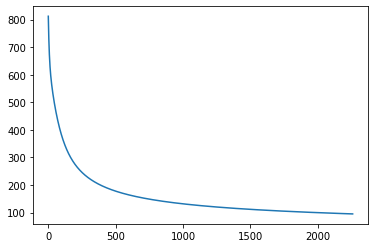

<Figure size 432x288 with 0 Axes>

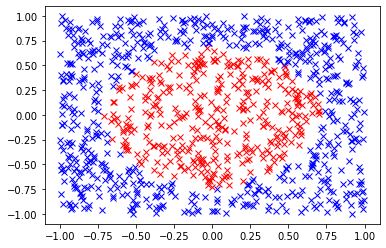

<Figure size 432x288 with 0 Axes>

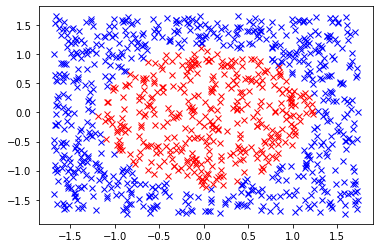

In [5]:
eps = 1e-20 # A small offset called epsilon. This will be used to ensure we don't get divide by 0 errors
nb = 3 #The number of bases for our features

# A function for normalising our data 
# there are two common methods for normalising data, both are below
def normalise_data(X):
  mean = np.mean(X, axis=1)
  std = np.std(X, axis=1)
  return (X.T-mean) / std , mean , std

# Function for calculating z
def get_z(W,X):
  return W@X

# Function for passing our pre-computed z value through a sigmoid non-linearity
def get_sigmoid(z):
  return 1/(1+np.exp(-z))

# Calculate the Binary Cross Entropy (BCE) Loss
def get_loss(y,yhat):
  return np.sum(-y*np.log(yhat+eps) - (1-y)*np.log(1-yhat+eps), axis =1)

# Function for calculating z
def get_z(W,X):
  return W@X

# Function for passing our pre-computed z value through a sigmoid non-linearity
def get_sigmoid(z):
  return 1/(1+np.exp(-z))

# Calculate the Binary Cross Entropy (BCE) Loss
def get_loss(y,yhat):
  return np.sum(-y*np.log(yhat) - (1-y)*np.log(1-yhat), axis =1)


X2, mean, std = normalise_data(X)
X2 = X2.T
print(X2)
print(X)

A=[] #List for appending/storing our newly created features

# Create our features - similar to creating features in the 2d linear regression examples
# the below method uses nested for-loops however a better solution would use vectorization
for i in range(nb):
  for j in range(nb):
    A.append(X2[0,:]**i * X2[1,:]**j)

# Convert our list to a numpy array
A = np.array(A)
print(A.shape)

ls =[] #Create a list for storing our loss values

#The learning rate (lr) is a user definable hyperparameter. A good value to start with is 1e-4
# We could alos implement annealing to reduce the learning rate through training
lr = 0.0001 

# Another hyperparamter is the number of epochs.
# This is easy to tune as if the loss funcion has not plateaued/converged then we need more epochs.
epochs = 10000

# Initialise our weights randomly. FYI - This should equal the number of features squared
W = np.random.randn(1, A.shape[0])

# We now need to iteratively calculate our loss, calulate our gradients and take a step towards better weights.
# An iteration here is called an "epoch"
for epoch in range(epochs):
  # First step is to calculate the loss for the current weights
  z = get_z(W,A)
  yhat = get_sigmoid(z)
  loss = get_loss(y, yhat)


  ls.append(loss) # Save the loss to plot later. (Ideally we would plot this every epoch to check the loss is going down)

  # Second step - calculate the gradients
  dZ = yhat - y
  dW = dZ@A.T

  # Third step - Update the weights 
  W -= lr*dW

# After the final epoch print our results
plt.plot(ls)
plt.figure()
# The middle plot is with the un-normalised data
plotClass(X,yhat>0.5,'x')
# This plot is of the normalised data
plt.figure()
plotClass(X2,yhat>0.5,'x')

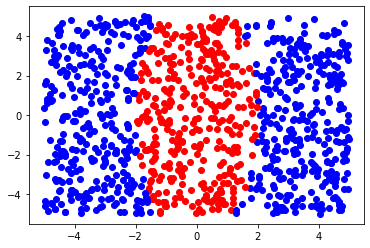

(2, 1000)
(1, 1000)


In [ ]:
#Q3
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=5*X[0,:]**2+0.5*X[1,:]**2-20>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

# Stochastic Gradient Descent

Lets work through a simple example of SGD.
In the ideal world we would form our batches from data randomly sampled from the dataset. If we were to do this we would need to ensure each datapoint is included in one batch and that no datapoint is repeated in an epoch

[[-1.71530252 -0.03678568  0.49951945 ... -0.19323315 -1.66076757
  -1.41803223]
 [-0.982413   -1.63309153  0.20209736 ... -0.9990784   0.56555287
  -0.03664083]]
[[-4.93137868 -0.03326233  1.53174131 ... -0.48979507 -4.77223905
  -4.0639078 ]
 [-3.0543264  -4.96046101  0.41564544 ... -3.10314698  1.48037263
  -0.28372775]]
(9, 1000)


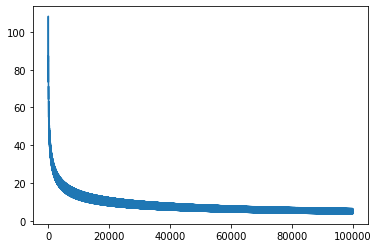

<Figure size 432x288 with 0 Axes>

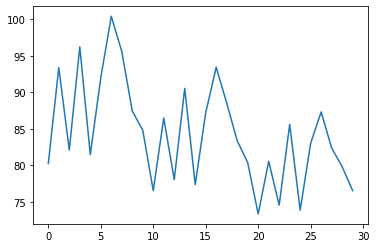

<Figure size 432x288 with 0 Axes>

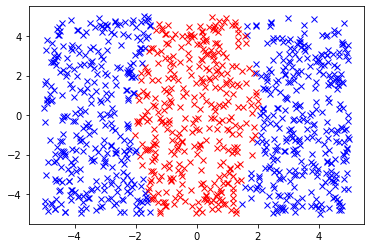

<Figure size 432x288 with 0 Axes>

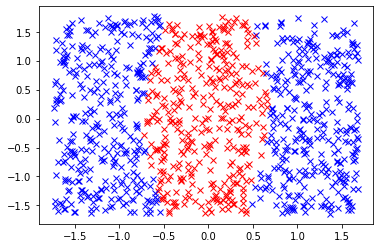

In [ ]:
eps = 1e-20 # A small offset called epsilon. This will be used to ensure we don't get divide by 0 errors
nb = 3 #The number of bases for our features
K = 10 # The number of batches to create

# A function for normalising our data 
# there are two common methods for normalising data, both are below
def normalise_data(X):
  mean = np.mean(X, axis=1)
  std = np.std(X, axis=1)
  return (X.T-mean) / std , mean , std

# Function for calculating z
def get_z(W,X):
  return W@X

# Function for passing our pre-computed z value through a sigmoid non-linearity
def get_sigmoid(z):
  return 1/(1+np.exp(-z))

# Calculate the Binary Cross Entropy (BCE) Loss
def get_loss(y,yhat):
  return np.sum(-y*np.log(yhat+eps) - (1-y)*np.log(1-yhat+eps), axis =1)

# Function for calculating z
def get_z(W,X):
  return W@X

# Function for passing our pre-computed z value through a sigmoid non-linearity
def get_sigmoid(z):
  return 1/(1+np.exp(-z))

# Calculate the Binary Cross Entropy (BCE) Loss
def get_loss(y,yhat):
  return np.sum(-y*np.log(yhat+eps) - (1-y)*np.log(1-yhat+eps), axis =1)


X2, mean, std = normalise_data(X)
X2 = X2.T
print(X2)
print(X)

A=[] #List for appending/storing our newly created features

# Create our features - similar to creating features in the 2d linear regression examples
# the below method uses nested for-loops however a better solution would use vectorization
for i in range(nb):
  for j in range(nb):
    A.append(X2[0,:]**i * X2[1,:]**j)

# Convert our list to a numpy array
A = np.array(A)
print(A.shape)

# Lets create some fixed batches. The number of batches will be equal to K
A2 = np.array_split(A, K, axis=1)
y2 = np.array_split(y, K, axis=1)

ls =[] #Create a list for storing our loss values

#The learning rate (lr) is a user definable hyperparameter. A good value to start with is 1e-4
# We could alos implement annealing to reduce the learning rate through training
lr = 0.0001 

# Another hyperparamter is the number of epochs.
# This is easy to tune as if the loss funcion has not plateaued/converged then we need more epochs.
epochs = 10000

# Initialise our weights randomly. FYI - This should equal the number of features squared
W = np.random.randn(1, A.shape[0])

# We now need to iteratively calculate our loss, calulate our gradients and take a step towards better weights.
# An iteration here is called an "epoch"
for epoch in range(epochs):
  # To compelte 1 epoch we need to loop through each batch of data and do a gradient update for each batch.
  for batch in range(K):
    # First step is to calculate the loss for the current weights
    z = get_z(W,A2[batch])
    yhat = get_sigmoid(z)
    loss = get_loss(y2[batch], yhat)


    ls.append(loss) # Save the loss to plot later. (Ideally we would plot this every epoch to check the loss is going down)

    # Second step - calculate the gradients
    dZ = yhat - y2[batch]
    dW = dZ@A2[batch].T

    # Third step - Update the weights 
    W -= lr*dW

# After the final epoch print our results
plt.plot(ls)
plt.figure()

# To be able to plot all the data we need to predict using the entire dataset A, not A2
z = get_z(W,A)
yhat = get_sigmoid(z)

# We can see if we zoom into the loss that the loss fluctuated a lot more when using SGD and batches. 
# This is normal and the behaviour we are after
plt.figure() 
plt.plot(ls[10:40])
plt.figure()

# The middle plot is with the un-normalised data
plotClass(X,yhat>0.5,'x')
# This plot is of the normalised data
plt.figure()
plotClass(X2,yhat>0.5,'x')

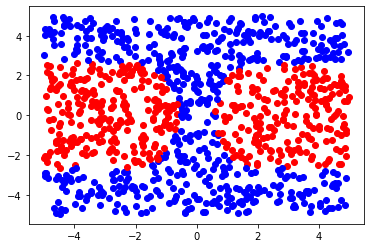

(2, 1000)
(1, 1000)


In [ ]:
#Q4
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=10*np.exp(-X[0,:]**2)+X[1,:]**2-7>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

# Momentum

Using momentum allows us to traverse complicated loss landscapes that are not convex. Our loss landscape is very simple so we are unlikely to see any improvement using momentum.

[[-0.93689861 -0.95642218  0.10480858 ...  0.25436206 -0.46324541
  -0.50950436]
 [ 0.08234295 -0.28312254  1.18524281 ...  0.01800376 -0.96115866
   0.03821012]]
[[-2.80485419 -2.86086747  0.18381145 ...  0.6128815  -1.44593965
  -1.57865694]
 [ 0.37702934 -0.64134817  3.45028371 ...  0.19774678 -2.53071053
   0.25405225]]
(25, 1000)


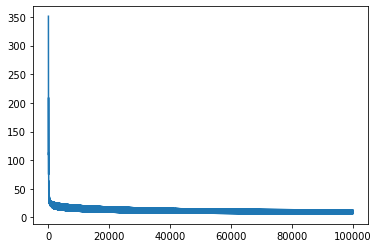

<Figure size 432x288 with 0 Axes>

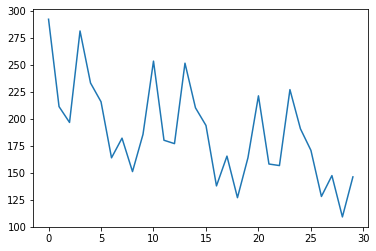

<Figure size 432x288 with 0 Axes>

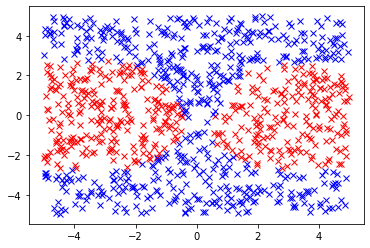

<Figure size 432x288 with 0 Axes>

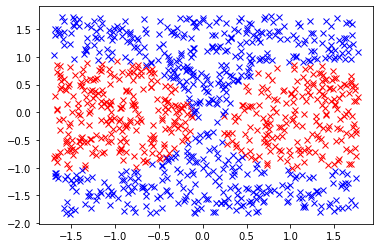

In [ ]:
eps = 1e-20 # A small offset called epsilon. This will be used to ensure we don't get divide by 0 errors
nb = 5 #The number of bases for our features
K = 10 # The number of batches to create
v = 0 #initial value for velocity
mu = 0.01 #value for "friction"

# A function for normalising our data 
# there are two common methods for normalising data, both are below
def normalise_data(X):
  mean = np.mean(X, axis=1)
  std = np.std(X, axis=1)
  return (X.T-mean) / std , mean , std

# Function for calculating z
def get_z(W,X):
  return W@X

# Function for passing our pre-computed z value through a sigmoid non-linearity
def get_sigmoid(z):
  return 1/(1+np.exp(-z))

# Calculate the Binary Cross Entropy (BCE) Loss
def get_loss(y,yhat):
  return np.sum(-y*np.log(yhat+eps) - (1-y)*np.log(1-yhat+eps), axis =1)

# Function for calculating z
def get_z(W,X):
  return W@X

# Function for passing our pre-computed z value through a sigmoid non-linearity
def get_sigmoid(z):
  return 1/(1+np.exp(-z))

# Calculate the Binary Cross Entropy (BCE) Loss
def get_loss(y,yhat):
  return np.sum(-y*np.log(yhat+eps) - (1-y)*np.log(1-yhat+eps), axis =1)


X2, mean, std = normalise_data(X)
X2 = X2.T
print(X2)
print(X)

A=[] #List for appending/storing our newly created features

# Create our features - similar to creating features in the 2d linear regression examples
# the below method uses nested for-loops however a better solution would use vectorization
for i in range(nb):
  for j in range(nb):
    A.append(X2[0,:]**i * X2[1,:]**j)

# Convert our list to a numpy array
A = np.array(A)
print(A.shape)

# Lets create some fixed batches. The number of batches will be equal to K
A2 = np.array_split(A, K, axis=1)
y2 = np.array_split(y, K, axis=1)

ls =[] #Create a list for storing our loss values

#The learning rate (lr) is a user definable hyperparameter. A good value to start with is 1e-4
# We could alos implement annealing to reduce the learning rate through training
lr = 0.0001 

# Another hyperparamter is the number of epochs.
# This is easy to tune as if the loss funcion has not plateaued/converged then we need more epochs.
epochs = 10000

# Initialise our weights randomly. FYI - This should equal the number of features squared
W = np.random.randn(1, A.shape[0])

# We now need to iteratively calculate our loss, calulate our gradients and take a step towards better weights.
# An iteration here is called an "epoch"
for epoch in range(epochs):
  # To compelte 1 epoch we need to loop through each batch of data and do a gradient update for each batch.
  for batch in range(K):
    # First step is to calculate the loss for the current weights
    z = get_z(W,A2[batch])
    yhat = get_sigmoid(z)
    loss = get_loss(y2[batch], yhat)


    ls.append(loss) # Save the loss to plot later. (Ideally we would plot this every epoch to check the loss is going down)

    # Second step - calculate the gradients
    dZ = yhat - y2[batch]
    dW = dZ@A2[batch].T

    # Third step - Update the weights with SGD and momentum. We require mu and v
    v = lr * dW + mu * v
    W = W-v

# After the final epoch print our results
plt.plot(ls)
plt.figure()

# To be able to plot all the data we need to predict using the entire dataset A, not A2
z = get_z(W,A)
yhat = get_sigmoid(z)

# We can see if we zoom into the loss that the loss fluctuated a lot more when using SGD and batches. 
# This is normal and the behaviour we are after
plt.figure() 
plt.plot(ls[10:40])
plt.figure()

# The middle plot is with the un-normalised data
plotClass(X,yhat>0.5,'x')
# This plot is of the normalised data
plt.figure()
plotClass(X2,yhat>0.5,'x')

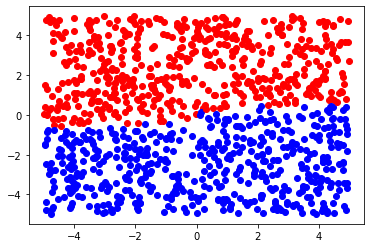

(2, 1000)
(1, 1000)


In [ ]:
#Q5
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=X[0,:]-20*X[1,:]**3>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

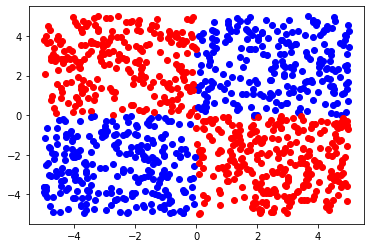

(2, 1000)
(1, 1000)


In [ ]:
#Q6
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=X[0,:]*X[1,:]>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

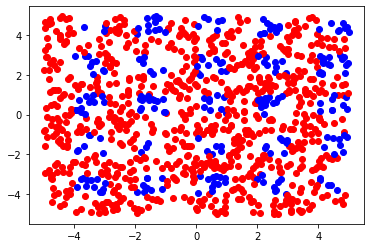

(2, 1000)
(1, 1000)


In [ ]:
#Q7
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=(np.floor(X[0,:]%2)==0)& (np.floor(X[1,:]%2)==0)>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)